# Oppgave 1

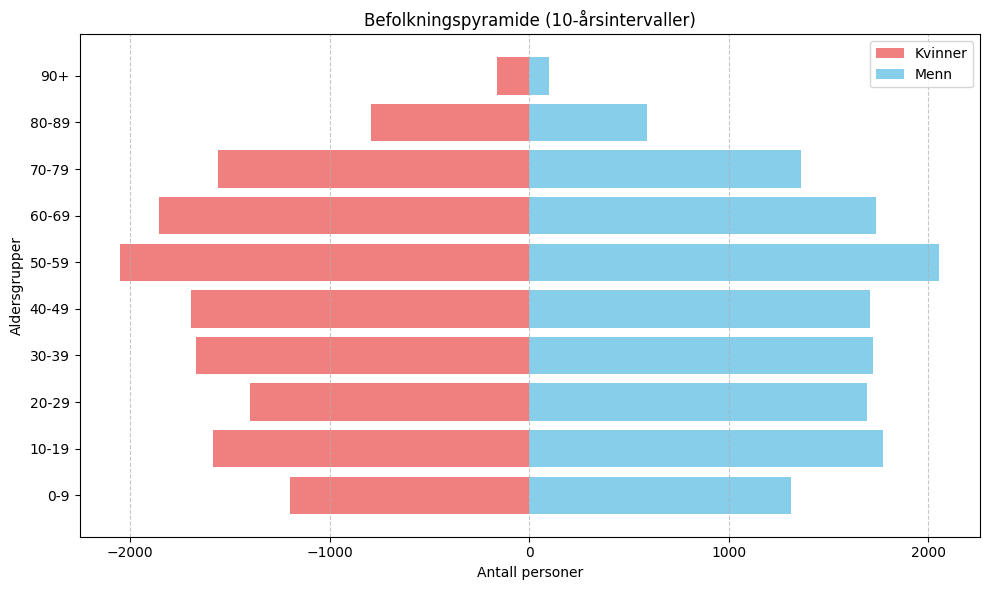

In [37]:
import pandas as pd

#Leser CSV med riktig separator og rydder kolonnenavn
df_aldersfordeling = pd.read_csv("aldersfordeling-for-innb.csv", sep=";")
df_aldersfordeling.columns = ["Alder", "Kvinner", "Menn"]

#Fjerner "-" foran tall og konvertere til int
df_aldersfordeling["Kvinner"] = df_aldersfordeling["Kvinner"].astype(str).str.replace("-", "").astype(int)
df_aldersfordeling["Kvinner"] *= -1  #Gjør tallene for kvinner negative for visning i pyramide

df_aldersfordeling["Menn"] = df_aldersfordeling["Menn"].astype(int)

#Ekstraherer start-alder for å gruppere i 10-årsbolker
def alder_til_gruppe(alder_str):
    start = int(alder_str.split()[0].split("-")[0])
    if start >= 90:
        return "90+"
    else:
        gruppe_start = (start // 10) * 10
        gruppe_slutt = gruppe_start + 9
        return f"{gruppe_start}-{gruppe_slutt}"

df_aldersfordeling["Aldersgruppe"] = df_aldersfordeling["Alder"].apply(alder_til_gruppe)

#Aggregerer kvinner og menn etter aldersgruppe
pyramide_df = df_aldersfordeling.groupby("Aldersgruppe")[["Kvinner", "Menn"]].sum().reset_index()

#Sorterer etter stigende aldersintervall
pyramide_df["Start"] = pyramide_df["Aldersgruppe"].apply(lambda x: int(x.split("-")[0].replace("+", "")))
pyramide_df = pyramide_df.sort_values("Start").drop(columns="Start")

import matplotlib.pyplot as plt

#Lager befolkningspyramide med eldste øverst
plt.figure(figsize=(10, 6))
plt.barh(pyramide_df["Aldersgruppe"], pyramide_df["Kvinner"], color='lightcoral', label="Kvinner")
plt.barh(pyramide_df["Aldersgruppe"], pyramide_df["Menn"], color='skyblue', label="Menn")
plt.xlabel("Antall personer")
plt.ylabel("Aldersgrupper")
plt.title("Befolkningspyramide (10-årsintervaller)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [38]:
#Beregner total antall innbyggere
total_kvinner = df_aldersfordeling["Kvinner"].sum()
total_menn = df_aldersfordeling["Menn"].sum()
total_innbyggere = abs(total_kvinner) + total_menn

total_kvinner, total_menn, total_innbyggere


(np.int64(-13972), np.int64(14067), np.int64(28039))

### Total befolkning i Horten:
Ved å summere antall menn og kvinner i datasettet, fikk vi:

**Kvinner:** 13 972

**Menn:** 14 067

**Totalt:** 28 039 innbyggere


Dette stemmer overens med tallene som SSB viser

# Oppgave 2

C:\Users\Nyxiu\AppData\Local\Temp\ipykernel_15260\3192820674.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


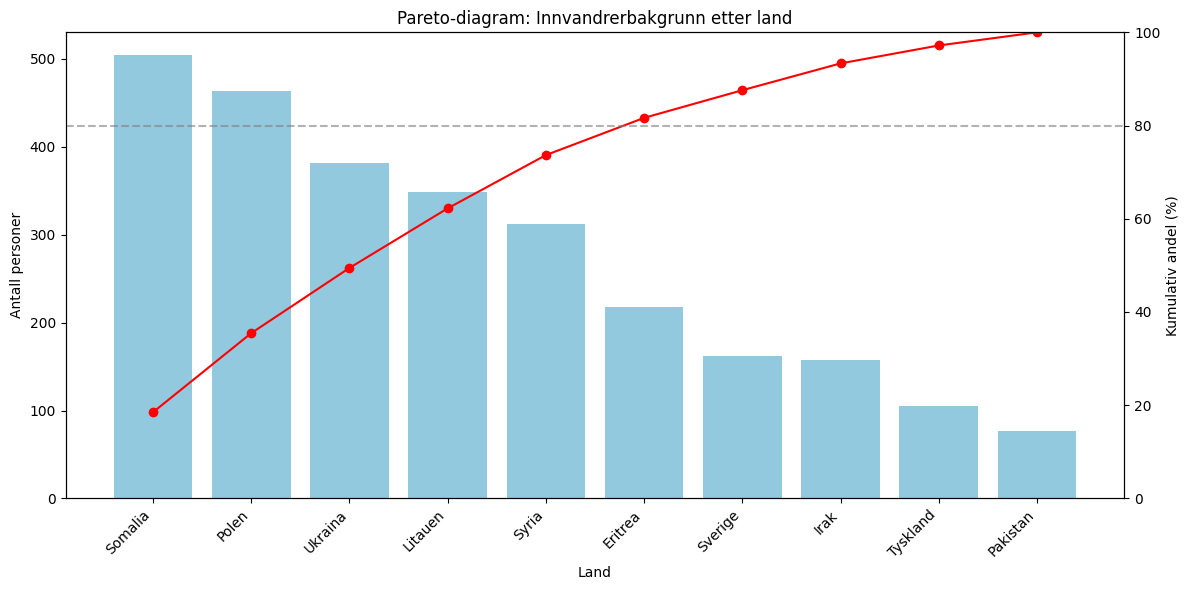

In [39]:
#Leser fil med riktig separator og rydder kolonnenavn
df_innvandrere = pd.read_csv("personer-med-innvandrerb.csv", sep=";")
df_innvandrere.columns = ["Land", "Antall"]

#Sortere etter antall i synkende rekkefølge
df_sorted = df_innvandrere.sort_values("Antall", ascending=False).reset_index(drop=True)

#Beregne kumulativ prosentandel
df_sorted["Kumulativ Andel"] = df_sorted["Antall"].cumsum() / df_sorted["Antall"].sum() * 100

import seaborn as sns

#Lager Pareto-diagram
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=df_sorted, x="Land", y="Antall", ax=ax1, color="skyblue")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Antall personer")
ax1.set_title("Pareto-diagram: Innvandrerbakgrunn etter land")

#Andre y-akse for kumulativ andel
ax2 = ax1.twinx()
ax2.plot(df_sorted["Land"], df_sorted["Kumulativ Andel"], color="red", marker="o", linestyle='-')
ax2.set_ylabel("Kumulativ andel (%)")
ax2.axhline(80, color='gray', linestyle='--', alpha=0.6)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()


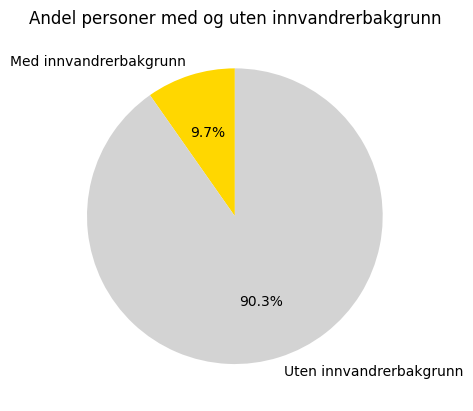

(np.int64(77), np.int64(2730))

In [40]:
#Finner minste antall innvandrere fra et enkelt land
min_innvandrere = df_innvandrere["Antall"].min()

#Total antall personer med innvandrerbakgrunn
total_innvandrere = df_innvandrere["Antall"].sum()

#Bruker tidligere beregnet totalbefolkning fra oppgave 1
total_befolkning = 28039
uten_innvandrerbakgrunn = total_befolkning - total_innvandrere

#Lager kakediagram
fig, ax = plt.subplots()
ax.pie(
    [total_innvandrere, uten_innvandrerbakgrunn],
    labels=["Med innvandrerbakgrunn", "Uten innvandrerbakgrunn"],
    autopct="%1.1f%%",
    colors=["gold", "lightgray"],
    startangle=90
)
ax.set_title("Andel personer med og uten innvandrerbakgrunn")
plt.show()

min_innvandrere, total_innvandrere


Vi ser her at totalen og minimumen er som følgende:

**Totalt med innvandrerbakgrunn:** 2 730 personer

**Minimum per land:** 77 personer

# Oppgave 3

In [41]:
#Definerer hvilket aldersgrupper som regnes som 20-65 år
arbeidsfor_aldersgrupper = [
    "20-24 år", "25-29 år", "30-34 år", "35-39 år", "40-44 år",
    "45-49 år", "50-54 år", "55-59 år", "60-64 år", "65-66 år"
]

#Fjerner evt mellomrom i alderstrengen for å være sikker
df_aldersfordeling["Alder"] = df_aldersfordeling["Alder"].str.strip()

#Filtrerer ut arbeidsfør alder
df_arbeidsfor = df_aldersfordeling[df_aldersfordeling["Alder"].isin(arbeidsfor_aldersgrupper)]

#Finner antall personer i arbeidsfør alder
total_arbeidsfor = abs(df_arbeidsfor["Kvinner"].sum()) + df_arbeidsfor["Menn"].sum()
total_arbeidsfor


np.int64(15872)

Det er totalt 15 872 personer i arbeidsfør alder 20-66 i Horten.

Når vi sammenligner dette med datasettet C så finner vi antallet som faktisk er sysselsatte.


In [42]:
# Laste inn datasettet C: hva innbyggerne jobber med
df_jobber = pd.read_csv("hva-innbyggerne-jobber-m.csv", sep=";")

# Rydde kolonnenavn
df_jobber.columns = ["Næring", "Antall"]

# Fjerne eventuelle rader uten tall
df_jobber = df_jobber.dropna()

# Konvertere antall til int
df_jobber["Antall"] = df_jobber["Antall"].astype(int)

# Finne totalt antall som jobber
total_sysselsatte = df_jobber["Antall"].sum()
total_sysselsatte


np.int64(12403)

Antall personer som jobber i kommunen er 12 403.

Vi kan framvise denne dataen i et stolpediagram.

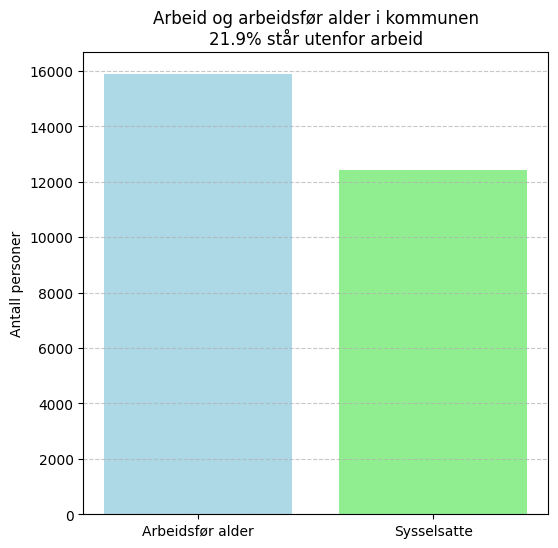

(np.int64(3469), np.float64(21.85609879032258))

In [43]:
#Estimerer prosentandel utenfor jobb
utenfor_job = total_arbeidsfor - total_sysselsatte
utenfor_job_prosent = (utenfor_job / total_arbeidsfor) * 100

#Lager stolpediagram
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(["Arbeidsfør alder", "Sysselsatte"], [total_arbeidsfor, total_sysselsatte], color=["lightblue", "lightgreen"])
ax.set_ylabel("Antall personer")
ax.set_title(f"Arbeid og arbeidsfør alder i kommunen\n{utenfor_job_prosent:.1f}% står utenfor arbeid")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

utenfor_job, utenfor_job_prosent


Ca. 21,9 % av personene i arbeidsfør alder står utenfor arbeid i kommunen.

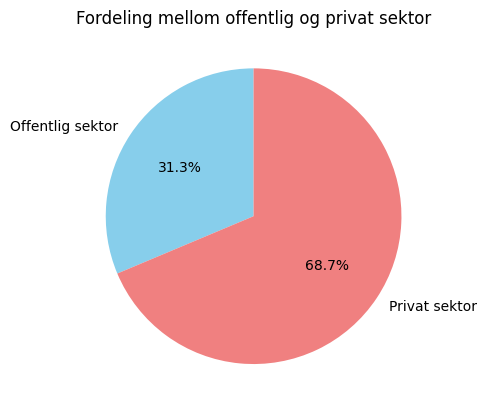

{'Offentlig sektor': 3887, 'Privat sektor': 8516}

In [44]:
#Definerer næringer som regnes som offentlig sektor
offentlig_naringer = [
    "Helse- og sosialtjenester",
    "Undervisning",
    "Offentlig administrasjon, forsvar, sosialforsikring"
]

#Oppretter ny kolonne med sektor-kategori
df_jobber["Sektor"] = df_jobber["Næring"].apply(
    lambda x: "Offentlig sektor" if x.strip() in offentlig_naringer else "Privat sektor"
)

#Summerer antall per sektor
sektor_data = df_jobber.groupby("Sektor")["Antall"].sum()

#Lager kakediagram
fig, ax = plt.subplots()
ax.pie(sektor_data,
    labels=sektor_data.index,
    autopct="%1.1f%%",
    colors=["skyblue", "lightcoral"],
    startangle=90)
ax.set_title("Fordeling mellom offentlig og privat sektor")
plt.show()

sektor_data.to_dict()


Denne forenklingen gjør sammenligningen veldig oversiktlig, men den blir også litt upresis i at noen næringen kan befinne seg innen både offentlig og privat sektor, som transport og renovasjon.

# Oppgave 4

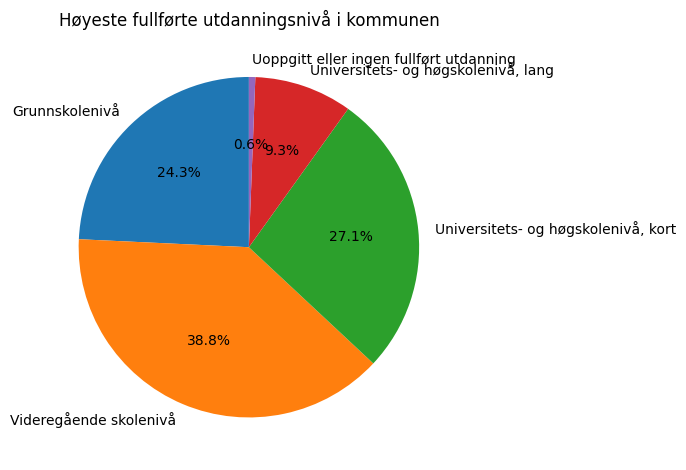

In [45]:
#Laster inn datasettet for utdanningsnivå
df_utdanning = pd.read_csv("hyeste-fullfrte-utdannin.csv", sep=";")

#Ser på de første radene for å forstå strukturen
df_utdanning.head()

#Lager kakediagram
fig, ax = plt.subplots()
ax.pie(df_utdanning["Personer 16 år og over"],
    labels=df_utdanning["Utdanningsnivå"],
    autopct="%1.1f%%",
    startangle=90)
ax.set_title("Høyeste fullførte utdanningsnivå i kommunen")
plt.tight_layout()
plt.show()


C:\Users\Nyxiu\AppData\Local\Temp\ipykernel_15260\2753886097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Utdanningsnivå",


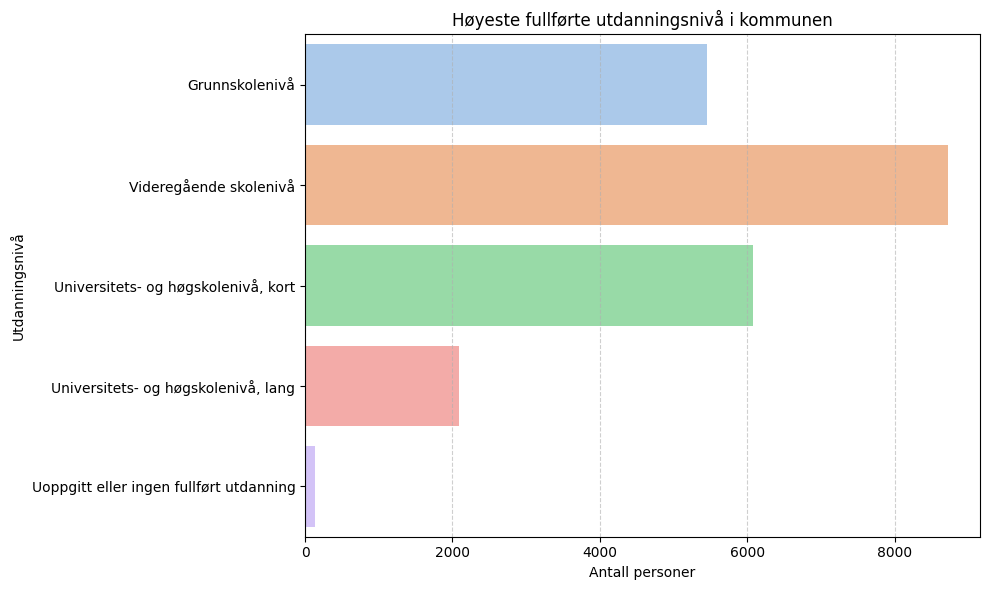

In [46]:
# Lage stolpediagram
plt.figure(figsize=(10, 6))
sns.barplot(y="Utdanningsnivå",
    x="Personer 16 år og over",
    data=df_utdanning,
    palette="pastel")
plt.title("Høyeste fullførte utdanningsnivå i kommunen")
plt.xlabel("Antall personer")
plt.ylabel("Utdanningsnivå")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Kakediagram gir en rask visuell oversikt over helhetsandelene, men de er og vanskelig å lese nøyaktige forskjeller, spesielt mellom like store kategorier.

Stolpediagram derimot, mens de tar mer plass og er mindre visuelt kompat, så gjør de det lett å sammenligne størrelser direkte, og blir klarere med mange kategorier.

# Oppgave 5

In [47]:
#Laster inn datasettet for kulturmidler
df_kultur = pd.read_csv("hva-bruker-kommunen-kult.csv", sep=";")

#ser på de første radene
# df_kultur.head()

# Total kulturbudsjett
totalt_kultur = df_kultur["2024"].sum()

# Beløp til kommunale idrettsbygg
idrettsbygg_belop = df_kultur.loc[
    df_kultur["Tjenesteområde"] == "Kommunale idrettsbygg og idrettsanlegg", "2024"
].values[0]

# Andel i prosent
andel_idrettsbygg = (idrettsbygg_belop / totalt_kultur) * 100

totalt_kultur, idrettsbygg_belop, andel_idrettsbygg


(np.int64(2313), np.int64(315), np.float64(13.618677042801556))

Resultatene forteller oss følgende:

Total kulturbudsjett: 2 313 000 kr

Til kommunale idrettsbygg: 315 000 kr

Andel til idrettsbygg: ca. 13,6 %

# Oppgave 6

In [48]:
#Laster inn datasettet for utgifter etter utvalgte områder
df_utgifter = pd.read_csv("utgifter-etter-utvalgte.csv", sep=";")

#ser på de første radene for potensiell debugging
#df_utgifter.head()

# Summere alle prosentandeler som er med i datasettet
inkludert_andel = df_utgifter["2024"].sum()

# Finne prosentandel som ikke er inkludert
ikke_inkludert = 100 - inkludert_andel

inkludert_andel, ikke_inkludert


(np.float64(89.0), np.float64(11.0))

Vi ser at datasettet dekker 89 % av kommunens totale utgifter og ikke alle, det vil si at 11 % av utgiftene ikke er inkludert i datagrunnlaget. Dette kan være ting som ikke er spesifisert i sektoroversikten, som renter, avdrag, interne overføringer, eller annet.

# Oppgave 7

In [49]:
#Laster inn datasettet for biltyper
df_biler = pd.read_csv("typer-av-biler-i-kommune.csv", sep=";")

#Ser på de første radene
#df_biler.head()

#Total antall biler
totalt_antall_biler = df_biler["2024"].sum()

#Antar at "Annet drivstoff" inneholder hybrid
hybrid_biler = df_biler.loc[df_biler["Drivstoff"] == "Annet drivstoff", "2024"].values[0]

#Andel i prosent
andel_hybrid = (hybrid_biler / totalt_antall_biler) * 100

totalt_antall_biler, hybrid_biler, andel_hybrid


(np.int64(14085), np.int64(2209), np.float64(15.683351082712104))

Vi tar følgende statistikk fra beregningene:


Totalt antall biler: 14 085

Hybrid/annet drivstoff: 2 209

Andel hybridbiler (omtrentlig): 15,7 %

In [50]:
# Definere hvilke aldersgrupper som regnes som "kjørbar alder" (20–79 år)
kjorbar_aldersgrupper = [
    "20-24 år", "25-29 år", "30-34 år", "35-39 år", "40-44 år",
    "45-49 år", "50-54 år", "55-59 år", "60-64 år", "65-66 år",
    "67-69 år", "70-74 år", "75-79 år"
]

# Filtrere relevant aldersdata
df_kjorbar = df_aldersfordeling[df_aldersfordeling["Alder"].isin(kjorbar_aldersgrupper)]

# Finne totalt antall personer i kjørbar alder
antall_kjorbare = abs(df_kjorbar["Kvinner"].sum()) + df_kjorbar["Menn"].sum()

# Antall biler per person
biler_per_person = totalt_antall_biler / antall_kjorbare

antall_kjorbare, biler_per_person


(np.int64(18794), np.float64(0.7494413110567202))

Antall personer i kjørbar alder (20–79 år): 18 794

Biler per person i kjørbar alder: 0,75

Det vil si at det finnes omtrent 3 biler for hver 4 personer i kjørbar alder i kommunen.

# Oppgave 8

C:\Users\Nyxiu\AppData\Local\Temp\ipykernel_15260\259708552.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_kolonne, y=tall_kolonne, data=df, palette="pastel")


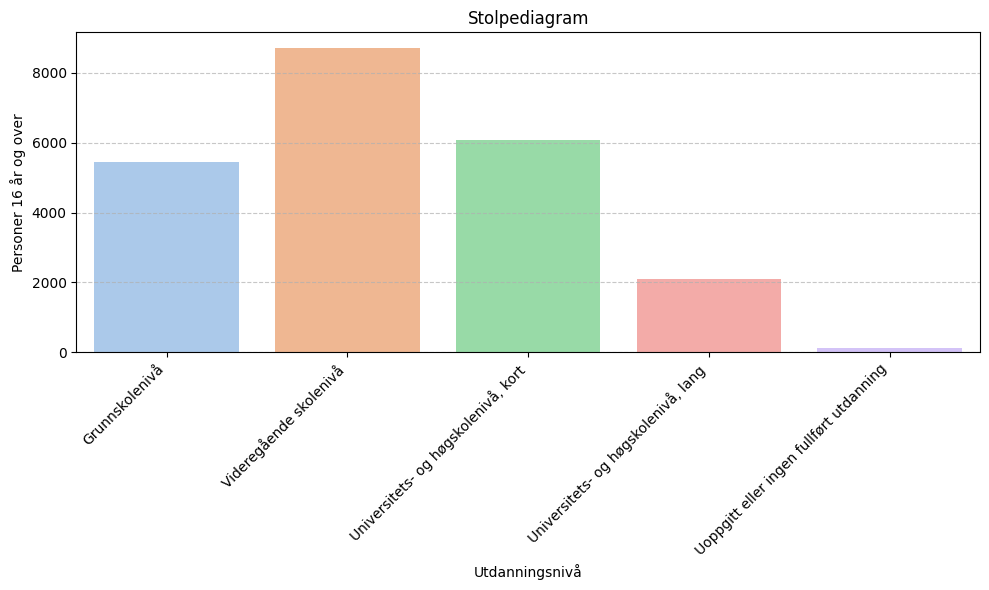

In [51]:
def stolpediagram(df, kategori_kolonne, tall_kolonne):
    """
    Lager et stolpediagram basert på en tabell med to kolonner.

    Parametre:
    df: DataFrame med data
    kategori_kolonne: Navnet på kolonnen med kategorier
    tall_kolonne: Navnet på kolonnen med tallverdier
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x=kategori_kolonne, y=tall_kolonne, data=df, palette="pastel")
    plt.title("Stolpediagram")
    plt.xlabel(kategori_kolonne)
    plt.ylabel(tall_kolonne)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Teste funksjonen på datasettet
stolpediagram(df_utdanning, "Utdanningsnivå", "Personer 16 år og over")

Det er ingen verdi som skal returneres eller viderebehandles, samt så blir grafen direkte vist med 'plt.show()', ergo en return statement ville ikke oppnådd noe mer i funksjonen.

# Oppgave 9

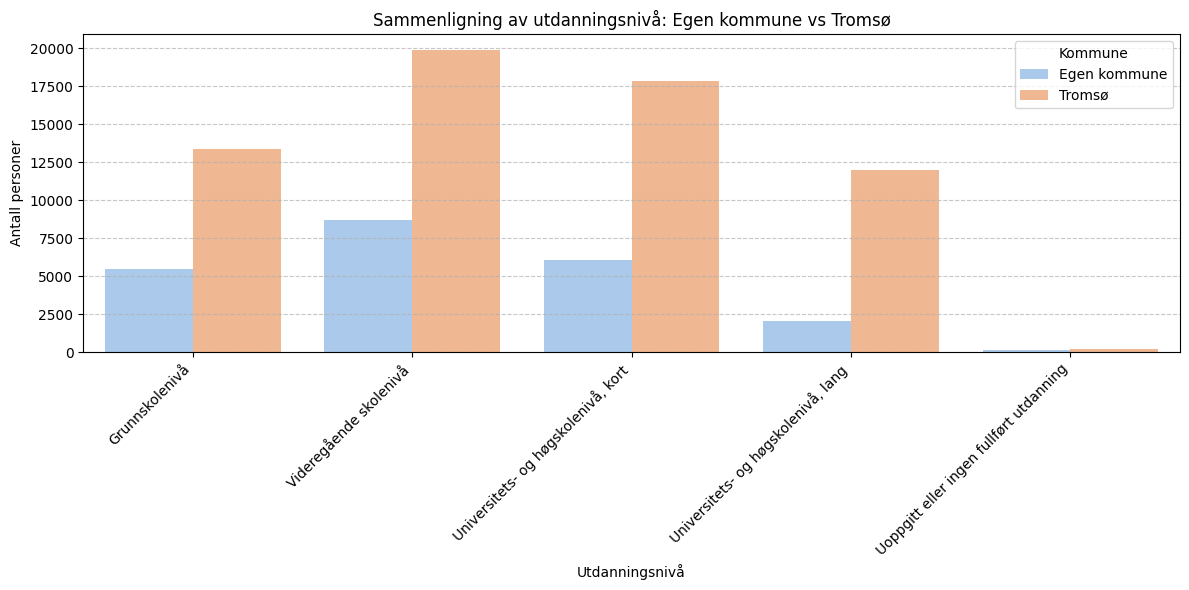

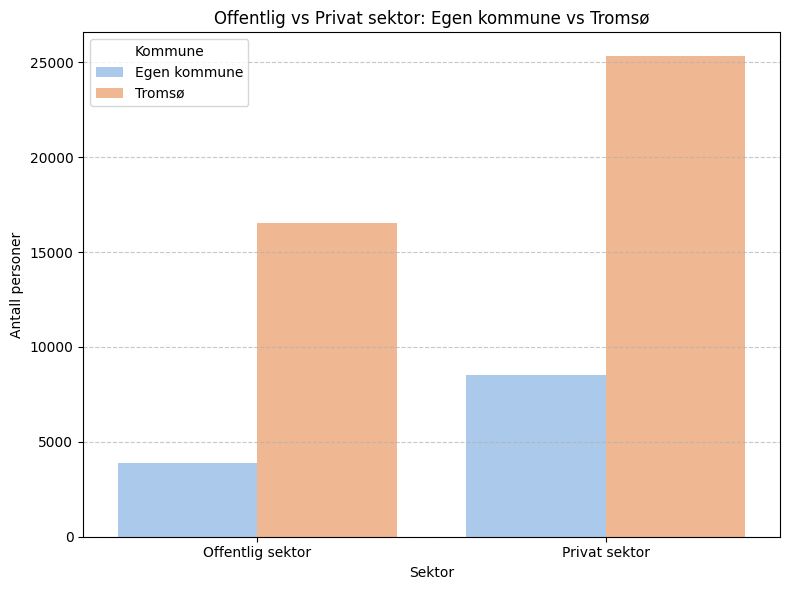

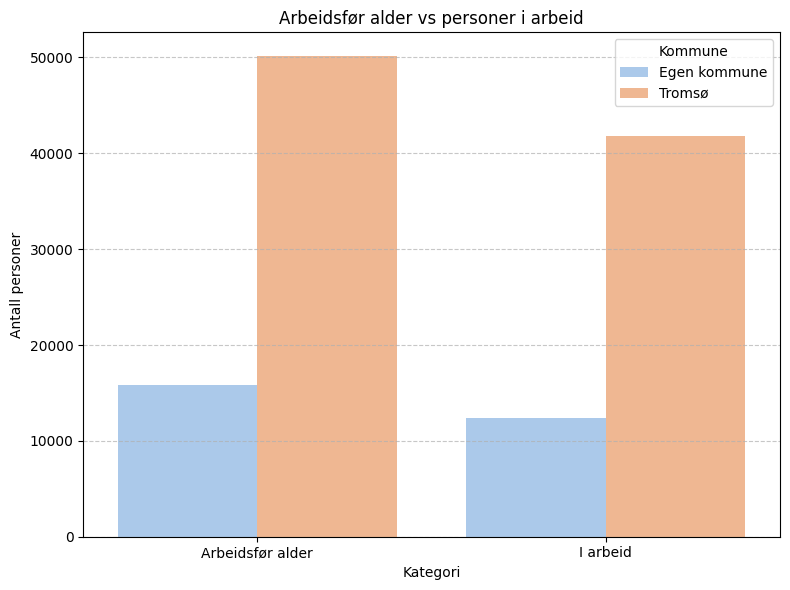

In [ ]:
#Leser inn filer for Tromsø
df_TA = pd.read_csv("aldersfordeling-for-innbtromso.csv", sep=";")
df_TJ = pd.read_csv("hva-innbyggerne-jobber-mtromso.csv", sep=";")
df_TU = pd.read_csv("hyeste-fullfrte-utdannintromso.csv", sep=";")

#Leser inn filer for Horten kommune igjen (orket ikke finne gamle variablene)
df_A = pd.read_csv("aldersfordeling-for-innb.csv", sep=";")
df_C = pd.read_csv("hva-innbyggerne-jobber-m.csv", sep=";")
df_D = pd.read_csv("hyeste-fullfrte-utdannin.csv", sep=";")

#Rydder kolonnenavn
df_A.columns = ["Alder", "Kvinner", "Menn"]
df_C.columns = ["Næring", "Antall"]
df_D.columns = ["Utdanningsnivå", "Personer 16 år og over"]

df_TA.columns = ["Alder", "Kvinner", "Menn"]
df_TJ.columns = ["Næring", "Antall"]
df_TU.columns = ["Utdanningsnivå", "Personer 16 år og over"]

#Lager to datasett: df_D (Horten) og df_TU (Tromsø)

#Lager en samlet DataFrame
utdanning_df = pd.DataFrame({
    "Utdanningsnivå": df_D["Utdanningsnivå"],
    "Horten kommune": df_D["Personer 16 år og over"],
    "Tromsø": df_TU["Personer 16 år og over"]
})

#Smelter datasettet for enklere plotting
utdanning_melted = utdanning_df.melt(id_vars="Utdanningsnivå", var_name="Kommune", value_name="Antall")

#Lager stolpediagram
plt.figure(figsize=(12, 6))
sns.barplot(data=utdanning_melted, x="Utdanningsnivå", y="Antall", hue="Kommune", palette="pastel")
plt.title("Sammenligning av utdanningsnivå: Horten kommune vs Tromsø")
plt.xlabel("Utdanningsnivå")
plt.ylabel("Antall personer")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Definerer offentlig sektor-næringer
offentlig_naringer = [
    "Helse- og sosialtjenester",
    "Undervisning",
    "Offentlig administrasjon, forsvar, sosialforsikring"
]

#Funksjon for å regne ut offentlig/privat for en kommune
def sektor_andeler(df):
    df["Sektor"] = df["Næring"].apply(lambda x: "Offentlig sektor" if x.strip() in offentlig_naringer else "Privat sektor")
    return df.groupby("Sektor")["Antall"].sum()

#Beregner for begge kommuner
horten_sektor = sektor_andeler(df_C)
tromso_sektor = sektor_andeler(df_TJ)

#Lager sammenligningsdata
sektor_sammenligning = pd.DataFrame({
    "Sektor": horten_sektor.index,
    "Horten kommune": horten_sektor.values,
    "Tromsø": tromso_sektor.values
})

sektor_melted = sektor_sammenligning.melt(id_vars="Sektor", var_name="Kommune", value_name="Antall")

#Lager stolpediagram
plt.figure(figsize=(8, 6))
sns.barplot(data=sektor_melted, x="Sektor", y="Antall", hue="Kommune", palette="pastel")
plt.title("Offentlig vs Privat sektor: Horten kommune vs Tromsø")
plt.xlabel("Sektor")
plt.ylabel("Antall personer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Funksjon for å finne antall i arbeidsfør alder
def arbeidsfor_aldersgruppe(df):
    arbeidsfor_aldre = [
        "20-24 år", "25-29 år", "30-34 år", "35-39 år", "40-44 år",
        "45-49 år", "50-54 år", "55-59 år", "60-64 år", "65-66 år"
    ]
    return abs(df[df["Alder"].isin(arbeidsfor_aldre)]["Kvinner"].sum()) + df[df["Alder"].isin(arbeidsfor_aldre)]["Menn"].sum()

#Finner tall
horten_arbeidsfor = arbeidsfor_aldersgruppe(df_A)
tromso_arbeidsfor = arbeidsfor_aldersgruppe(df_TA)

#Antall som jobber
horten_jobber = df_C["Antall"].sum()
tromso_jobber = df_TJ["Antall"].sum()

#Lager sammenligningsdata
arbeidsstokk_df = pd.DataFrame({
    "Kommune": ["Horten kommune", "Tromsø"],
    "Arbeidsfør alder": [horten_arbeidsfor, tromso_arbeidsfor],
    "I arbeid": [horten_jobber, tromso_jobber]
})

arbeidsstokk_melted = arbeidsstokk_df.melt(id_vars="Kommune", var_name="Kategori", value_name="Antall")

#Lager stolpediagram
plt.figure(figsize=(8, 6))
sns.barplot(data=arbeidsstokk_melted, x="Kategori", y="Antall", hue="Kommune", palette="pastel")
plt.title("Arbeidsfør alder vs personer i arbeid")
plt.xlabel("Kategori")
plt.ylabel("Antall personer")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


- Vi ser forskjeller i utdanningsnivå, der Tromsø typisk har høyere andel med lang høyere utdanning.

- Offentlig sektor sysselsetter omtrent samme andel i begge kommuner, men privat sektor kan variere noe.

- Arbeidsstokken i jobb avhenger av både antall i arbeidsfør alder og hvor mange som faktisk er sysselsatt.